<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Quim_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pint
!pip install pint uncertainties
import uncertainties
from uncertainties import ufloat
import pint as pint
ureg=pint.UnitRegistry(auto_reduce_dimensions=True)
Measurement=ureg.Measurement
Quantity=ureg.Quantity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Datos

Vol = np.arange(0,25.5,0.5)
Vol_U = Quantity(Vol, 'mL')

V = np.array([344.4, 339.4, 337, 333.5, 330.3, 328.8, 326.6, 324.1, 321.5, 319.1, 316.2, 311.2, 308.3, 298.5, 292.7, 286.5, 280.5, 272.1, 259.8, 242.8, 212.1, 43, 31.1, 23.4, 17.7, 13.7, 9.3, 4.7, 1.7, -1.2, -4.9, -8.7, -18.8, -40.7, -50.6, -62.7, -71.5, -83.9, -98.8, -133.7, -314.5, -338.8, -351, -358.2, -364.2, -369, -372.2, -375.4, -378.3, -379.4, -381.7])
V_U = Quantity(V, 'mV')

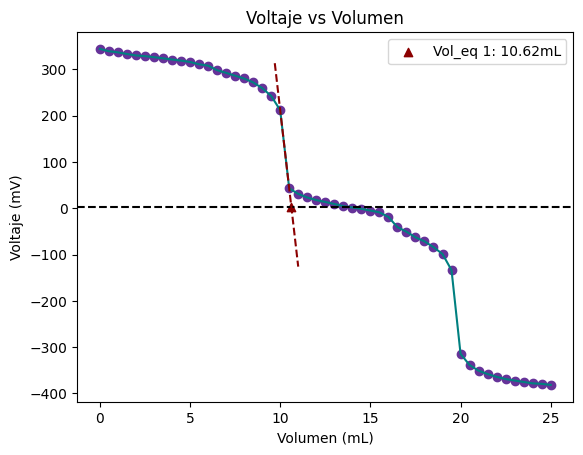

In [5]:
# Primera derivada y volumen de equivalencia 1

plt.scatter(Vol, V, c='rebeccapurple', marker= 'o')
plt.plot(Vol, V, c='teal')
plt.title('Voltaje vs Volumen')
plt.xlabel('Volumen (mL)')
plt.ylabel('Voltaje (mV)')
plt.axhline(y=3, color='black', linestyle='--')

m = (V[21]-V[20])/(Vol[21]-Vol[20])
b = V[20] - m*Vol[20]

x = np.linspace(9.7, 11, 50)
y = m*x + b
plt.plot(x, y, c='darkred', linestyle = '--')

xeq = (3-b)/m
plt.scatter(xeq, 3, c='darkred', label = 'Vol_eq 1: ' + str(round(xeq,2)) + 'mL', marker = '^')

plt.legend()
plt.show()

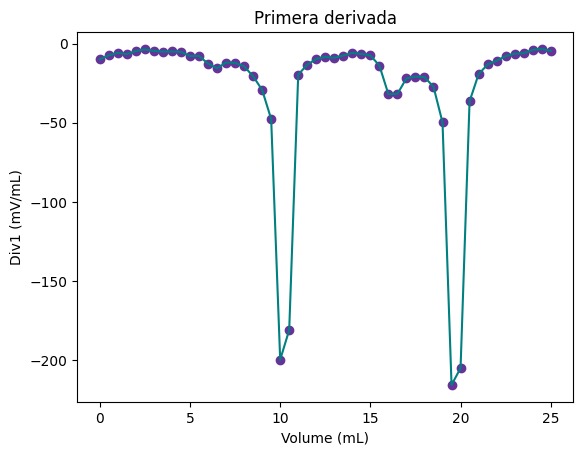

In [6]:
# Primera derivada

Div1 = np.gradient(V, Vol)

plt.scatter(Vol, Div1, c='rebeccapurple')
plt.plot(Vol, Div1, c='teal')
plt.title('Primera derivada')
plt.xlabel('Volume (mL)')
plt.ylabel('Div1 (mV/mL)')
plt.show()

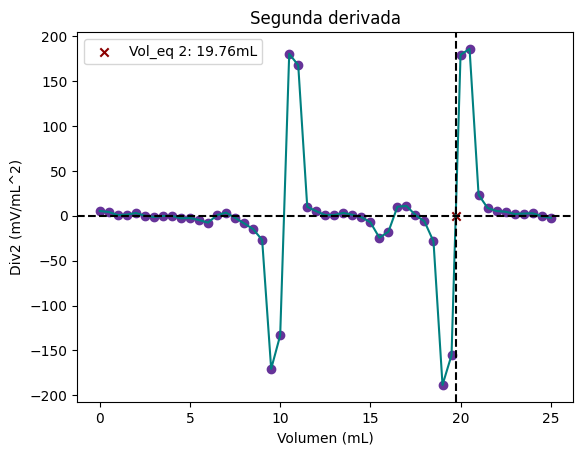

In [7]:
# Segunda derivada y volumen de equivalencia 2

Div2 = np.gradient(Div1, Vol)

plt.scatter(Vol, Div2, c='rebeccapurple')
plt.plot(Vol, Div2, c='teal')
plt.title('Segunda derivada')
plt.xlabel('Volumen (mL)')
plt.ylabel('Div2 (mV/mL^2)')
plt.axhline(y=0, color='black', linestyle='--')
plt.axvline(x=19.76, color='black', linestyle='--')
plt.scatter(19.76, 0, c='darkred', label = 'Vol_eq 2: ' + str(round(19.76,2)) + 'mL', marker = 'x')

plt.legend()
plt.show()

In [8]:
# Cálculos

Vol_Sol = Quantity(250, 'mL')
Vol_Sol = Vol_Sol.to('L')

Vol_eq1 = Quantity(xeq, 'mL')
Vol_eq2 = Quantity(19.76, 'mL') - Vol_eq1
Vol_eq1 = Vol_eq1.to('L')
Vol_eq2 = Vol_eq2.to('L')

g_Ag = Quantity(3.3971, 'g')
FM_AgNO3 = Quantity(169.87, 'g/mol')

M_Ag = g_Ag/(FM_AgNO3*Vol_Sol)
M_Ag = M_Ag.to('M')

MI = (M_Ag*Vol_eq1)/Vol_Sol
MCl = (M_Ag*Vol_eq2)/Vol_Sol

FM_I = Quantity(166.0028, 'g/mol')
FM_Cl = Quantity(74.5513, 'g/mol')

g_I = (M_Ag*Vol_eq1*FM_I).to('g')*25
g_Cl = (M_Ag*Vol_eq2*FM_Cl).to('g')*25

g_T = Quantity(4.998, 'g')

P_I = (g_I/g_T)*100
P_Cl = (g_Cl/g_T)*100

np.round(P_I + P_Cl,2), np.round(P_I, 2), np.round(P_Cl,2), np.round(MCl,4), np.round(MI,5)

(<Quantity(97.8, 'dimensionless')>,
 <Quantity(70.53, 'dimensionless')>,
 <Quantity(27.27, 'dimensionless')>,
 <Quantity(0.0029, 'molar')>,
 <Quantity(0.0034, 'molar')>)

In [11]:
# Errores

PI_Teo = 68.83
PCl_Teo = 30.17

PI_Err = np.abs(PI_Teo - P_I)/PI_Teo *100
PCl_Err = np.abs(PCl_Teo - P_Cl)/PCl_Teo *100

np.round(PI_Err,2), np.round(PCl_Err,2)

(<Quantity(2.47, 'dimensionless')>, <Quantity(9.61, 'dimensionless')>)